# Bayesian Gaussian Mixture

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


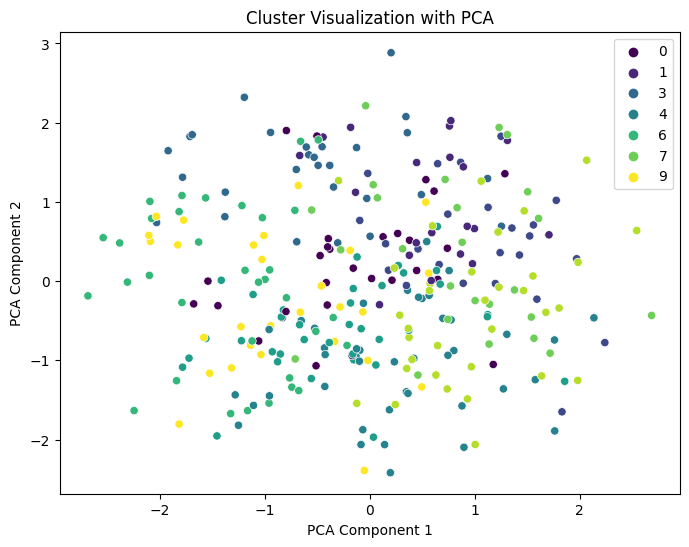

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = '/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv'  # Replace with your file path
dengue_data = pd.read_csv(file_path)

# Drop 'Residence' for this analysis
dengue_data_cleaned = dengue_data

# Identifying numerical and categorical columns
numerical_cols = dengue_data_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = dengue_data_cleaned.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False), categorical_cols)  # Ensure dense output
    ])

X_processed = preprocessor.fit_transform(dengue_data_cleaned)

# Apply Bayesian Gaussian Mixture with Dirichlet Process
bgmm = BayesianGaussianMixture(n_components=10,
                               weight_concentration_prior_type='dirichlet_process',
                               covariance_type='full', random_state=0)
bgmm.fit(X_processed)

# Predict cluster assignments
cluster_assignments = bgmm.predict(X_processed)

# Dimensionality Reduction for Visualization (using PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_assignments, palette='viridis')
plt.title('Cluster Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# Gaussian Mixture

Accuracy: 0.51, Precision: 0.45394736842105265, Recall: 0.518796992481203, F1 Score: 0.4842105263157895, MCC: 0.02165253024534294


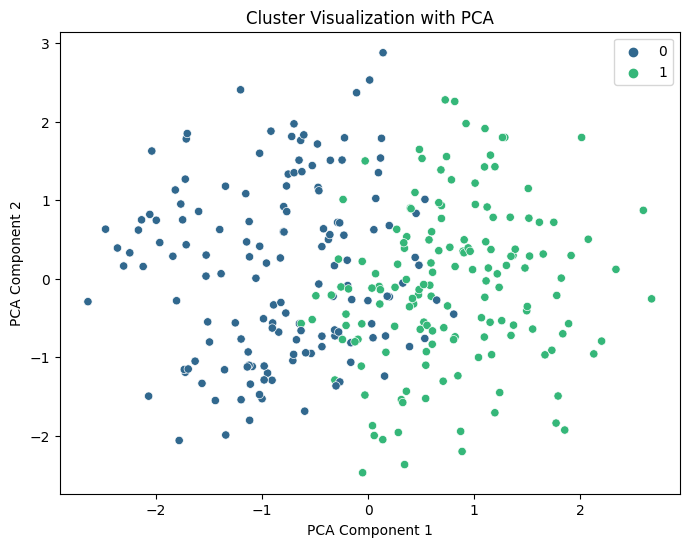

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv'  # Replace with your file path
dengue_data = pd.read_csv(file_path)

# Preprocessing
features = dengue_data.drop(columns=['NS1'])
target = dengue_data['NS1']

numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = features.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False), categorical_cols)
    ])

X_processed = preprocessor.fit_transform(features)

# Encoding target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Train the Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X_processed)

# Predict cluster assignments
cluster_assignments = gmm.predict(X_processed)

# Evaluate the model
accuracy = accuracy_score(target_encoded, cluster_assignments)
precision = precision_score(target_encoded, cluster_assignments)
recall = recall_score(target_encoded, cluster_assignments)
f1 = f1_score(target_encoded, cluster_assignments)
mcc = matthews_corrcoef(target_encoded, cluster_assignments)

# Print the metrics
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}, MCC: {mcc}")

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_assignments, palette='viridis')
plt.title('Cluster Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# Quadratic Discriminant Analysis

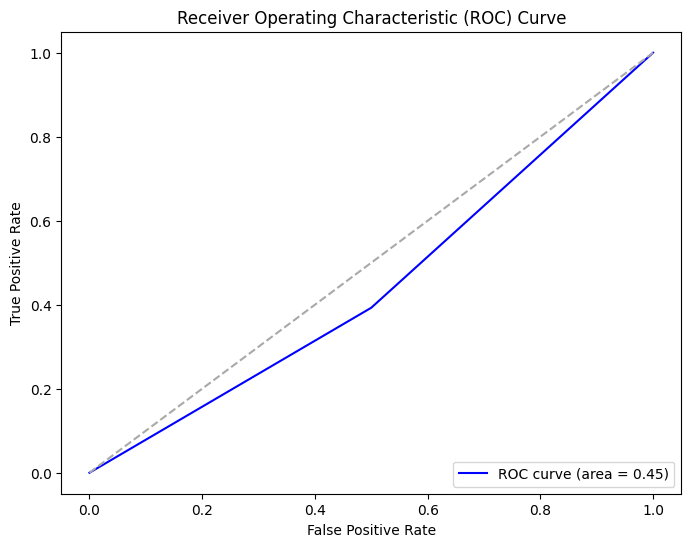

Accuracy: 0.45
Precision: 0.4074074074074074
Recall: 0.39285714285714285
F1 Score: 0.39999999999999997
Matthews Correlation Coefficient: -0.1074430618700507


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv'  # Replace with your file path
dengue_data = pd.read_csv(file_path)

# Preprocessing
features = dengue_data.drop(columns=['NS1'])
target = dengue_data['NS1']

numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = features.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False), categorical_cols)
    ])

X_processed = preprocessor.fit_transform(features)

# Encoding target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, target_encoded, test_size=0.2, random_state=0)

# Train the Quadratic Discriminant Analysis model
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# Predictions
y_pred = qda_model.predict(X_test)
y_pred_proba = qda_model.predict_proba(X_test)[:, 1]

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Printing Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)


# Linear Discriminant Analysis

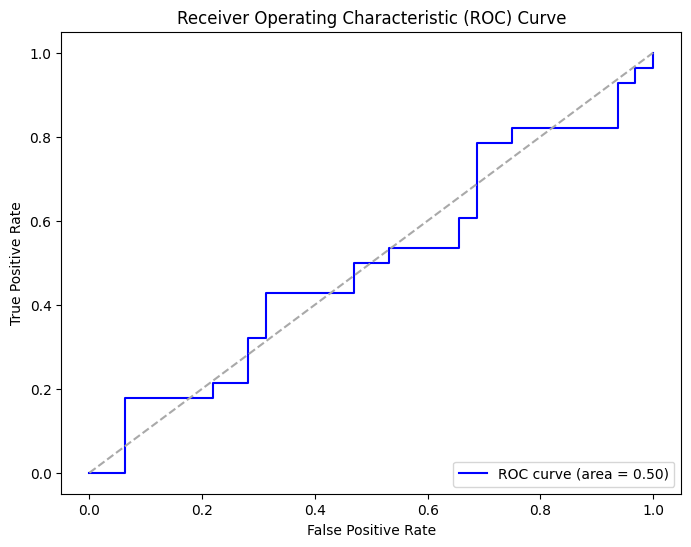

Accuracy: 0.48333333333333334
Precision: 0.4444444444444444
Recall: 0.42857142857142855
F1 Score: 0.43636363636363634
Matthews Correlation Coefficient: -0.040291148201269014


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv'  # Replace with your file path
dengue_data = pd.read_csv(file_path)

# Preprocessing
features = dengue_data.drop(columns=['NS1'])
target = dengue_data['NS1']

numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = features.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False), categorical_cols)
    ])

X_processed = preprocessor.fit_transform(features)

# Encoding target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, target_encoded, test_size=0.2, random_state=0)

# Train the Linear Discriminant Analysis model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Predictions
y_pred = lda_model.predict(X_test)
y_pred_proba = lda_model.predict_proba(X_test)[:, 1]

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Printing Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)


# AdaBoost Classifier

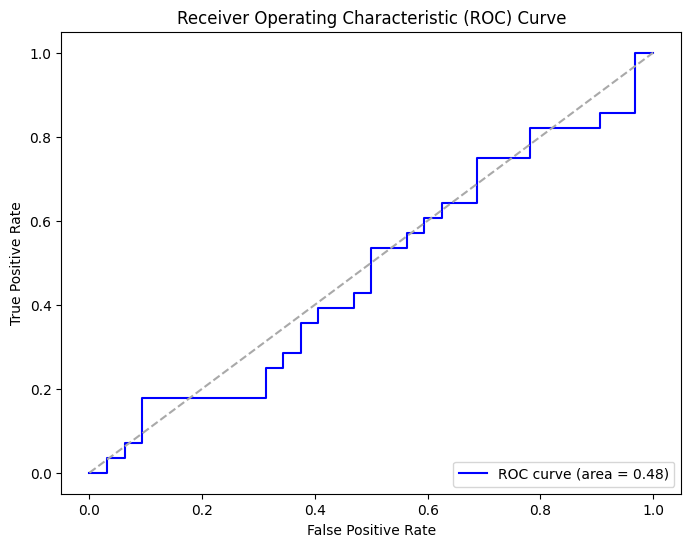

Accuracy: 0.48333333333333334
Precision: 0.43478260869565216
Recall: 0.35714285714285715
F1 Score: 0.39215686274509803
Matthews Correlation Coefficient: -0.05038878558710019


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv'  # Replace with your file path
dengue_data = pd.read_csv(file_path)

# Preprocessing
features = dengue_data.drop(columns=[ 'NS1'])
target = dengue_data['NS1']

numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = features.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False), categorical_cols)
    ])

X_processed = preprocessor.fit_transform(features)

# Encoding target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, target_encoded, test_size=0.2, random_state=0)

# Train the AdaBoost Classifier
ada_boost_model = AdaBoostClassifier(random_state=0)
ada_boost_model.fit(X_train, y_train)

# Predictions
y_pred = ada_boost_model.predict(X_test)
y_pred_proba = ada_boost_model.predict_proba(X_test)[:, 1]

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Printing Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)


# Passive Aggressive Classifier

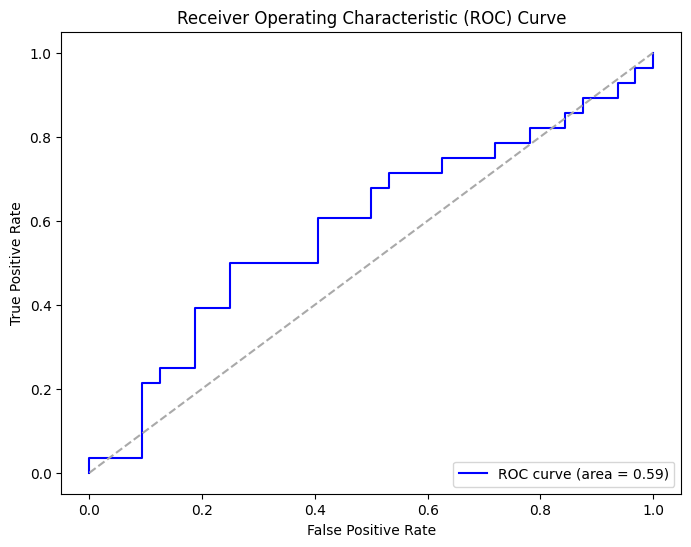

Accuracy: 0.5666666666666667
Precision: 0.5384615384615384
Recall: 0.5
F1 Score: 0.5185185185185186
Matthews Correlation Coefficient: 0.12584555642690842


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/kaggle/input/final-dengue-datasets/DengueFinalDatasets.csv'  # Replace with your file path
dengue_data = pd.read_csv(file_path)

# Preprocessing
features = dengue_data.drop(columns=['NS1'])
target = dengue_data['NS1']

numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = features.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False), categorical_cols)
    ])

X_processed = preprocessor.fit_transform(features)

# Encoding target variable
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, target_encoded, test_size=0.2, random_state=0)

# Train the PassiveAggressive Classifier
pa_classifier = PassiveAggressiveClassifier(max_iter=1000, random_state=0)
pa_classifier.fit(X_train, y_train)

# Predictions
y_pred = pa_classifier.predict(X_test)
y_pred_proba = pa_classifier.decision_function(X_test)  # For ROC curve

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Printing Metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
